# 1. 기초통계

![1-1](../image/1-1.jpg)

## 0. 사용데이터
[출처: Japan Hostel-Dataset](https://www.kaggle.com/koki25ando/hostel-world-dataset)

### Columns
* Row: num
* hostel.nameHostel: Name
* CityCity name: where hostel is located in
* price.fromMinimum: Price for 1 night stay
* DistanceDistance: from city center (km)
* summary.scoreSummary: score of ratings
* rating.bandRating: band
* atmosphereRating: score of atmosphere
* cleanlinessRating: score of cleanliness
* facilitiesRating: score of falicities
* location.yRating: score of location
* securityRating: score of security
* staffRating: score of staff
* valueformoneyRating: score of value for money
* lon: Longitude
* lat: Latitude

In [182]:
# 필요 라이브러리 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [195]:
# 데이터 불러오기 및 전처리
dataset = pd.read_csv('../data/Hostel.csv')
dataset = dataset.dropna() # 결측치 제거
dataset = dataset.drop(dataset.columns[0], axis=1)

In [131]:
dataset.head(3)

,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716


In [132]:
# 데이터 요약정보
dataset.describe()

,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
count,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,9.228188e+03,8.827852,8.325503,9.085235,8.653356,8.715436,8.978188,9.163423,8.869799,136.756376,34.976583
std,8.184564e+04,0.907097,1.266834,1.103644,1.218795,1.107320,1.073602,1.049501,1.009364,3.251995,2.040896
min,1.000000e+03,3.100000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,103.873135,1.310820
25%,2.000000e+03,8.600000,8.000000,8.900000,8.125000,8.300000,8.800000,9.000000,8.600000,135.505314,34.668900
50%,2.500000e+03,9.000000,8.600000,9.400000,9.000000,9.000000,9.200000,9.400000,9.050000,135.761617,34.998471
75%,2.900000e+03,9.400000,9.000000,9.800000,9.300000,9.400000,9.600000,9.800000,9.500000,139.770187,35.696709
max,1.003200e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,139.877880,36.204824


In [83]:
# 청결도
cleanliness = dataset['cleanliness'].values # Series를 numpy.ndarray로 변환
# 대기오염
atmosphere = dataset['atmosphere'].values

## 01. 기초 통계

### 산술 평균(mean) 
* 자료의 총합을 자료의 개수로 나눈 것을 말합니다.
* 자료의 분포를 질점계의 분포로 보면 무게 중심에 해당합니다.
* 산술평균 외에도 기하평균, 조화평균, 가중평균 등이 있습니다.

$$\overline{x} = {1\over n}{\sum_{i=1}^n x_i}$$

In [102]:
def mean(x):
    return sum(x)/len(x)

In [103]:
print("청결도 평균: ", mean(cleanliness))
print("대기오염 평균: ", mean(atmosphere))

청결도 평균:  9.08523489932886
대기오염 평균:  8.325503355704704


In [104]:
# 라이브러리
print("청결도 평균: ", np.mean(cleanliness))
print("대기오염 평균: ", np.mean(atmosphere))

청결도 평균:  9.085234899328858
대기오염 평균:  8.325503355704697


### 분산(variance) 
* 자료로부터 평균값의 차이(편차)에 대한 제곱 값의 평균을 말함
* 자료의 흩어진 정도를 나타낸다.

$$s^2 = {1\over n-1}{\sum_{i=1}^n {(x_i-\overline{x})^2}}$$

In [105]:
def varience(x):
    return mean((x-mean(x)) **2)

In [106]:
print("청결도 분산: ", varience(cleanliness))
print("대기오염 분산: ", varience(atmosphere))

청결도 분산:  1.2139430656276757
대기오염 분산:  1.5994838070357216


In [108]:
# 라이브러리
print("청결도 분산: ", np.var(cleanliness))
print("대기오염 분산: ", np.var(atmosphere))

청결도 분산:  1.2139430656276744
대기오염 분산:  1.5994838070357191


### 표준 편차(standard deviation)
분산의 제곱근을 취하여 자료의 단위와 일치시킨 것을 말한다.

$$s = \sqrt{ {1 \over n-1}{\sum_{i=1}^n (x_i-\overline{x})^2}}$$

In [88]:
def stdev(x):
    return varience(x) **(1/2)

In [109]:
print("청결도 분산: ", stdev(atmosphere))
print("대기오염 분산: ", stdev(cleanliness))

청결도 분산:  1.2647070044226534
대기오염 분산:  1.1017908447739415


In [111]:
# 라이브러리
print("청결도 분산: ", np.std(atmosphere))
print("대기오염 분산: ", np.std(cleanliness))

청결도 분산:  1.2647070044226525
대기오염 분산:  1.1017908447739408


### 공분산

* 두 개 이상의 변량 데이터가 주어질 경우에 각 변량간의 변화하는 양상을 나타내는 통계적 척도

$$\overline{x} = {1\over n}{\sum_{i=1}^n x_i}, \overline{y} = {1\over n}{\sum_{i=1}^n y_i}$$
$$C(x, y) = {1 \over n-1} {\sum_{i=1}^n {(x_i-\overline{x})(y_i-\overline{y})}}$$

In [91]:
def cov(x, y):
    m_x = mean(x)
    m_y = mean(y)
    return sum((x-m_x)*(y-m_y))/(len(x)-1)

In [92]:
print("청결도와 대기오염의 공분산: ", cov(cleanliness, atmosphere))

청결도와 대기오염의 공분산:  0.903913181027274


In [112]:
# 라이브러리
np.cov(atmosphere, cleanliness)

array([[1.60486927, 0.90391318],
       [0.90391318, 1.21803042]])

### 상관계수

* 두 변량 X,Y 사이의 상관관계의 정도를 나타내는 수치(계수)

#### 상관계수값의 의미 (출처: 위키피디아)
* -1에 가까운 값이 얻어지면 : 누가 봐도 매우 강력한 음(-)의 상관. 오히려 너무 확고하기 때문에 일부 연구자들은 데이터를 조작한 게 아닌가 의심할 정도이다. 사회과학 한정이다. 순수학문에 가까운 분야일수록 요구되는 상관관계는 높은 편.
* -0.5 정도의 값이 얻어지면 : 강력한 음(-)의 상관. 연구자는 변인 x 가 증가하면 변인 y 가 감소한다고 자신 있게 말할 수 있다.
* -0.2 정도의 값이 얻어지면 : 음(-)의 상관이긴 한데 너무 약해서 모호하다. 상관관계가 없다고는 할 수 없지만 좀 더 의심해 봐야 한다.
* 0 정도의 값이 얻어지면 : 대부분의 경우, 상관관계가 존재하지 않을 것이라고 간주된다. 다른 후속 연구들을 통해 뒤집어질지는 모르지만 일단은 회의적이다. 2차 방정식 그래프와 비슷한 모양이 될 경우 상관관계는 있으나 상관계수는 0에 가깝게 나온다.
* 0.2 정도의 값이 얻어지면 : 너무 약해서 의심스러운 양(+)의 상관. 이것만으로는 상관관계에 대해 아주 장담할 수는 없다. 하지만 사회과학에선 매우 큰 상관관계가 있는 것으로 간주한다.
* 0.5 정도의 값이 얻어지면 : 강력한 양(+)의 상관. 변인 x 가 증가하면 변인 y 가 증가한다는 주장은 이제 통계적으로 지지받고 있다.
* 1에 가까운 값이 얻어지면 : 이상할 정도로 강력한 양(+)의 상관. 위와 마찬가지로, 이렇게까지 확고한 상관관계는 오히려 쉽게 찾아보기 어렵다.

In [119]:
def corrcoef(x, y):
    return cov(x,y)/(stdev(x)*stdev(y))

In [121]:
print("청결도와 대기오염의 상관계수: ", corrcoef(atmosphere, cleanliness))

청결도와 대기오염의 상관계수:  0.6486906470416247


In [122]:
# 라이브러리
np.corrcoef(atmosphere, cleanliness)

array([[1.        , 0.64651383],
       [0.64651383, 1.        ]])

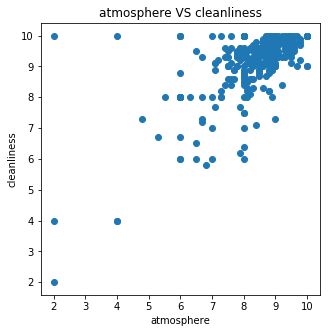

In [208]:
plt.figure(figsize=(5, 5))
plt.title('atmosphere VS cleanliness')
plt.scatter(atmosphere, cleanliness)
plt.xlabel('atmosphere')
plt.ylabel('cleanliness')
plt.show()